In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage.transform import resize
import matplotlib.cm as cm

In [2]:
path = 'Z:/ptychography/BO_optimization/multislice_BaM_4/results/'

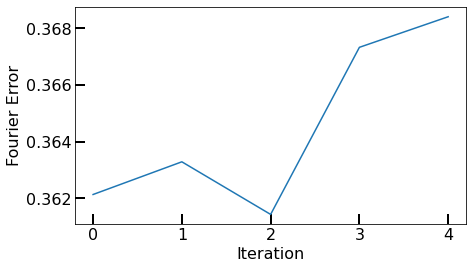

In [5]:
train_X = np.load(path + 'train_X.npy')[1:,:]
train_Y = np.load(path + 'train_Y.npy')[1:]

# number of points with highest error to be removed
bad_points = 0
for _ in range(bad_points):
    idx = np.argmin(train_Y)
    train_Y = np.delete(train_Y, idx)
    train_X = np.delete(train_X, idx, axis = 0)

min_idx = np.argmax(train_Y)
par_list = ['alpha_max', 'defocus', 'rot_ang']
par_list = ['alpha_max', 'defocus', 'rot_ang', 'thickness']

fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize = [7,4])

ax.plot(np.exp(-train_Y))
ax.set_ylabel('Fourier Error', fontsize = 16)
ax.set_xlabel('Time (minutes)',fontsize = 16)
ax.set_xlabel("Iteration", fontsize = 16)
ax.tick_params(which='major',direction = 'in', length = 10, width = 2, labelsize = 16)
ax.tick_params(which='minor',direction = 'in', length = 5)

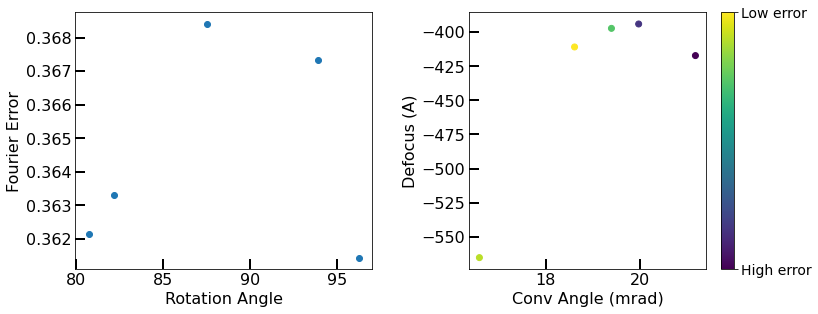

In [8]:
# plot the data points in two plots, one for defocus+convergence angle, the other one for rotation
fig, axes = plt.subplots(ncols = 2, nrows = 1, figsize = [12,5])

ax = axes
sc = ax[1].scatter(train_X[:,0], train_X[:,1], c = train_Y[:len(train_X)])
cbar = fig.colorbar(sc, ticks=[min(train_Y[:len(train_X)]), max(train_Y[:len(train_X)])])
cbar.ax.set_yticklabels(['High error',  'Low error'])
cbar.ax.tick_params(labelsize=14)
ax[1].set_ylabel('Defocus (A)', fontsize = 16)
ax[1].set_xlabel('Conv Angle (mrad)',fontsize = 16)

ax[0].scatter(train_X[:,2], np.exp(-train_Y[:len(train_X)]))
ax[0].set_ylabel('Fourier Error', fontsize = 16)
ax[0].set_xlabel('Rotation Angle',fontsize = 16)
# ax[1].set_ylim([0,0.15])

ax[1].tick_params(which='major',direction = 'in', length = 10, width = 2, labelsize = 16)
ax[1].tick_params(which='minor',direction = 'in', length = 5)

ax[0].tick_params(which='major',direction = 'in', length = 10, width = 2, labelsize = 16)
ax[0].tick_params(which='minor',direction = 'in', length = 5)

fig.tight_layout(pad=3.0)

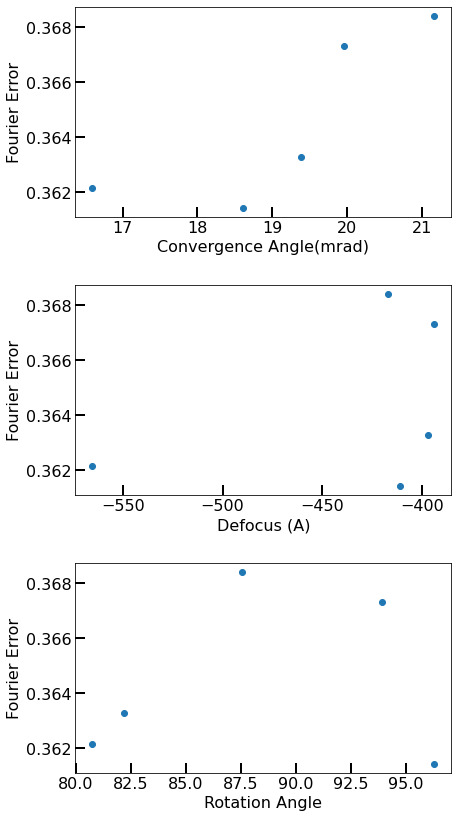

In [9]:
# plot the data points in three separate plots, one for each parameter
fig, axes = plt.subplots(ncols = 1, nrows = 3, figsize = [7, 12])

ax = axes
ax[0].scatter(train_X[:,0], np.exp(-train_Y[:len(train_X)]))
ax[0].set_ylabel('Fourier Error', fontsize = 16)
ax[0].set_xlabel('Convergence Angle(mrad)',fontsize = 16)

ax[1].scatter(train_X[:,1], np.exp(-train_Y[:len(train_X)]))
ax[1].set_ylabel('Fourier Error', fontsize = 16)
ax[1].set_xlabel('Defocus (A)',fontsize = 16)

ax[2].scatter(train_X[:,2], np.exp(-train_Y[:len(train_X)]))
ax[2].set_ylabel('Fourier Error', fontsize = 16)
ax[2].set_xlabel('Rotation Angle',fontsize = 16)

ax[0].tick_params(which='major',direction = 'in', length = 10, width = 2, labelsize = 16)
ax[0].tick_params(which='minor',direction = 'in', length = 5)

ax[1].tick_params(which='major',direction = 'in', length = 10, width = 2, labelsize = 16)
ax[1].tick_params(which='minor',direction = 'in', length = 5)

ax[2].tick_params(which='major',direction = 'in', length = 10, width = 2, labelsize = 16)
ax[2].tick_params(which='minor',direction = 'in', length = 5)

fig.tight_layout(pad=3.0)

Z:/ptychography/BO_optimization/multislice_BaM_4/results/error_1.0177_alpha_max_18.609_defocus_-410.921_rot_ang_96.275_thickness_211.331.tiff


(-0.5, 184.5, 184.5, -0.5)

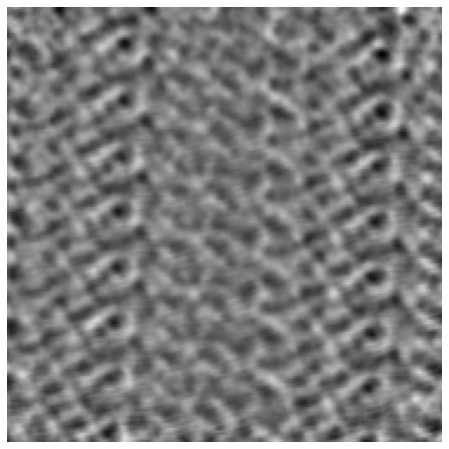

In [10]:
# Load the reconstructed phase object for the parameter with the optimized parameteres
idx = min_idx
tiffile = path
tiffile += "error_{:.4f}_".format(train_Y[idx])
for i in range(len(par_list)):
    tiffile += (par_list[i] + '_' + "{:.3f}".format(float(train_X[idx][i]))+'_')
tiffile = tiffile[:-1] + '.tiff'
print(tiffile)
image1 = np.array(Image.open(tiffile))
image1 = (image1 - np.min(image1))/(np.max(image1) - np.min(image1))


fig, axes = plt.subplots(ncols = 1, nrows = 1, figsize = [8,8])
axes.imshow(image1, cmap = 'gray')
plt.axis('off')